In [37]:
#import pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#change display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [45]:
#read in and preview file
file_path = 'kickstarter.csv'

data = pd.read_csv(file_path, index_col = 'id')
print(data.head(1))

           Unnamed: 0  backers_count  \
id                                     
857125548           0              1   

                                                       blurb currency    goal  \
id                                                                              
857125548  Exploring paint and its place in a digital world.      USD  2000.0   

                   launched_at             deadline location.country   name  \
id                                                                            
857125548  2015-03-19 22:34:57  2015-04-30 23:12:00               US  Remix   

           usd_pledged  ... days_to_deadline  goal_USD  category_name  \
id                      ...                                             
857125548         25.0  ...               42    2000.0    Digital Art   

           category_slug blurb_length  location_type  location_country  \
id                                                                       
857125548            art     

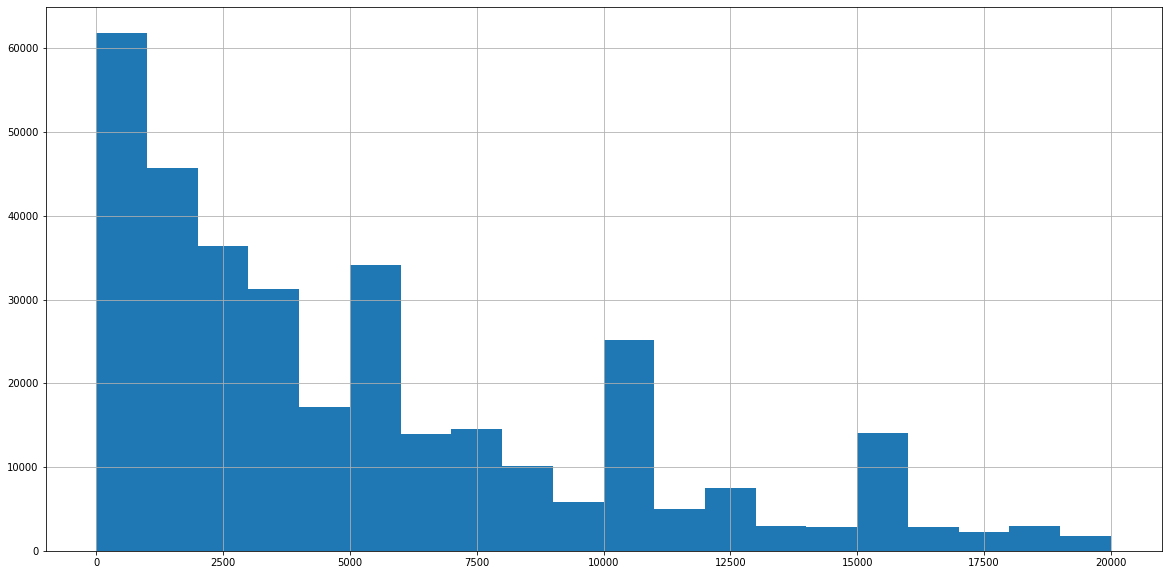

In [65]:
#attempt to understand goal_USD data shape by only looking at data under 20k (too zoomed out without the restriction)
data['goal_USD'].loc[data['goal_USD'] < 20000].hist(bins = 20, figsize=(20,10))
plt.show()

I decided to throw out data with a goal under $1000 as they do not seem to be "serious" crowdfunding projects.

In [104]:
#throwing data with a goal under 1000
cleaned_data = data.loc[data['goal_USD'] >= 1000]
#print out approximate time when data was captured
print(cleaned_data['launched_at'].max())
#filter out data where target date is beyond the date of the data
cleaned_data = cleaned_data.loc[cleaned_data['deadline'] <= cleaned_data['launched_at'].max()]

2019-04-18 04:49:38


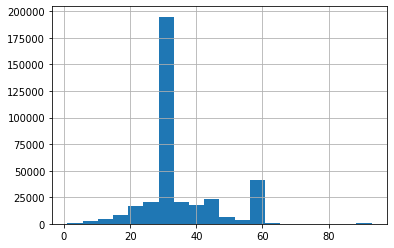

In [107]:
#create a new column for days between launch and goal date
cleaned_data['launched_at'] = pd.to_datetime(cleaned_data['launched_at'])
cleaned_data['deadline'] = pd.to_datetime(cleaned_data['deadline'])

cleaned_data['days_between'] = (cleaned_data['deadline'] - cleaned_data['launched_at']).dt.days
cleaned_data['days_between'].hist(bins = 20)
plt.show()

Most Kickstarters have the deadline set at around 30 days from the launch date. There are no extreme outliers (or they have been filtered out).

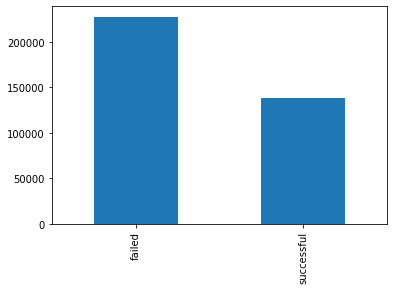

In [120]:
#checking to make sure those that exceeded goal did not receive a failure grade; this is an attempt to understand the 'binary_state' column.
cleaned_data.loc[cleaned_data['usd_pledged']>cleaned_data['goal_USD']]
exceed_goal.loc[exceed_goal['binary_state']=='failed'].head()
#create a bar chart of binary_state column
cleaned_data['binary_state'].value_counts().plot(kind='bar')
plt.show()

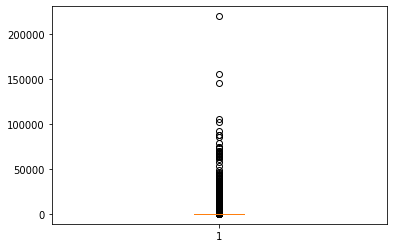

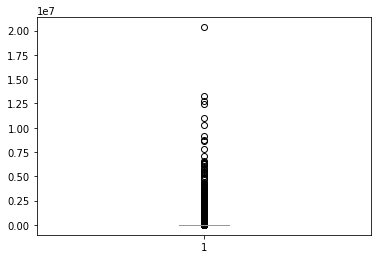

In [110]:
#looking distribution of the backers_count and pledged amount columns
plt.boxplot(cleaned_data['backers_count'])
plt.show()
plt.boxplot(cleaned_data['usd_pledged'])
plt.show()

Successful Kickstarter campaigns are outliers in themselves

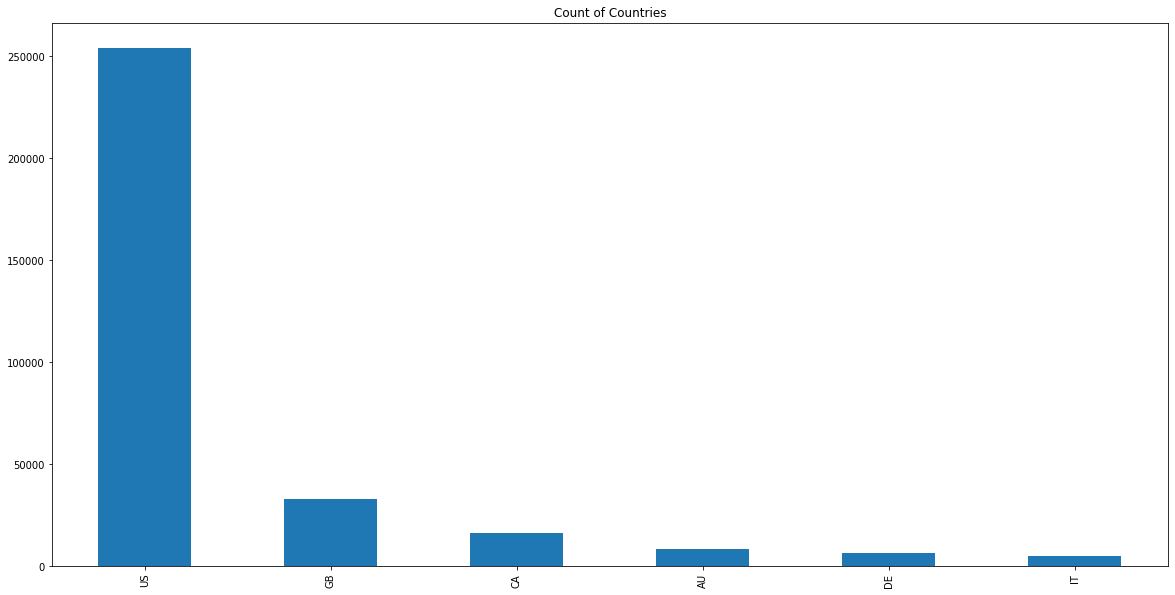

In [114]:
#show the frequency of location country for those with at least 5000 occurrences
cleaned_data['location.country'].value_counts()[cleaned_data['location.country'].value_counts()>5000].plot(kind='bar',
                                    figsize=(20,10),
                                    title="Count of Countries")
plt.show()


There are only six countries with more than 5000 occurrences. The US dominates with Great Britain and Canada coming in second and third.